<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/02_pytorch_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [ ]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

# Setup random seed
RANDOM_SEED = 42

In [ ]:
device

'cpu'

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [ ]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons
n_samples = 1000
# Create circles
X, y = make_moons(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [ ]:
# Turn data into a DataFrame
import pandas as pd
make_moons = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
make_moons.head(10)

,X1,X2,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
5,0.579542,-0.352979,1
6,0.294884,-0.209238,1
7,-0.014488,0.435896,1
8,1.626510,-0.281207,1
9,0.671598,0.786422,0


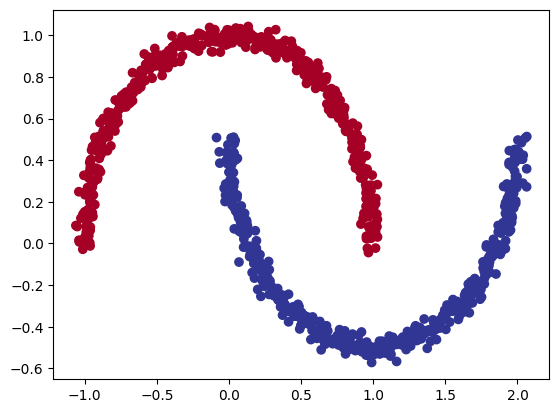

In [ ]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

เช็คว่า รูปร่าง (shape) ของฟีเจอร์และเลเบลของตัวอย่างแรกมีขนาดที่สอดคล้องกัน.

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [-0.00933187  0.39098105] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [ ]:
type(X),X.dtype,type(y),y.dtype

(numpy.ndarray, dtype('float64'), numpy.ndarray, dtype('int64'))

In [ ]:
# Turn data into tensors of dtype float
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[-0.0093,  0.3910],
         [ 0.9546, -0.4738],
         [ 0.9185, -0.4252],
         [ 0.4128, -0.3764],
         [-0.8453,  0.5288]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X),X.dtype,type(y),y.dtype

(torch.Tensor, torch.float32, torch.Tensor, torch.float32)

In [ ]:

# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,#20% test, 80% train
                                                    random_state=42)

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [ ]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=5)
        self.layer_3 = nn.Linear(in_features=5, out_features=1)
        nn.ReLU()
        # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        ## Your code here ##
        return self.layer_3(self.layer_2(self.layer_1(x)))

# Instantiate the model
## Your code here ##
model_0 = MoonModelV0().to(device)
model_0

MoonModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=5, bias=True)
  (layer_3): Linear(in_features=5, out_features=1, bias=True)
)

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [ ]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()
# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [ ]:
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.6430],
        [-0.7107],
        [-0.7165],
        [-0.7031],
        [-0.7979]], grad_fn=<SliceBackward0>)

In [ ]:
# What's coming out of our model?

# logits (raw outputs of model)
print("Logits:")
print(model_0(X_train.to(device)[:10]).squeeze())

# Prediction probabilities
print("Pred probs:")
print(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze()))

# Prediction probabilities
print("Pred labels:")
print(torch.round(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze())))

Logits:
tensor([-0.8211, -0.5175, -0.6338, -0.6315, -0.6328, -0.6177, -0.6459, -0.6175,
        -0.6886, -0.5095], grad_fn=<SqueezeBackward0>)
Pred probs:
tensor([0.3055, 0.3734, 0.3466, 0.3472, 0.3469, 0.3503, 0.3439, 0.3503, 0.3344,
        0.3753], grad_fn=<SigmoidBackward0>)
Pred labels:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<RoundBackward0>)


In [ ]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

In [ ]:
## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [ ]:
torch.manual_seed(42)

epochs = 100 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = acc_fn(y_train,y_pred.int())

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()
    ### Testing
    model_0.eval()
    with torch.inference_mode() :
      # 1. Forward pass
      test_logits = model_0(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      # 2. calculate loss/accuracy
      test_loss = loss_fn(test_logits,
                    y_test)
      test_acc = acc_fn(test_pred,y_test.int())
    # print out
    # if epoch % 100 == 0:
    #   print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
      # Print out what's happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 0.24 Acc: 0.89 | Test loss: 0.24 Test acc: 0.89
Epoch: 10 | Loss: 0.24 Acc: 0.89 | Test loss: 0.24 Test acc: 0.89
Epoch: 20 | Loss: 0.24 Acc: 0.89 | Test loss: 0.24 Test acc: 0.89
Epoch: 30 | Loss: 0.24 Acc: 0.89 | Test loss: 0.24 Test acc: 0.89
Epoch: 40 | Loss: 0.24 Acc: 0.89 | Test loss: 0.24 Test acc: 0.89
Epoch: 50 | Loss: 0.24 Acc: 0.89 | Test loss: 0.24 Test acc: 0.89
Epoch: 60 | Loss: 0.24 Acc: 0.89 | Test loss: 0.24 Test acc: 0.89
Epoch: 70 | Loss: 0.24 Acc: 0.89 | Test loss: 0.24 Test acc: 0.89
Epoch: 80 | Loss: 0.24 Acc: 0.89 | Test loss: 0.24 Test acc: 0.89
Epoch: 90 | Loss: 0.24 Acc: 0.89 | Test loss: 0.24 Test acc: 0.89


## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [ ]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

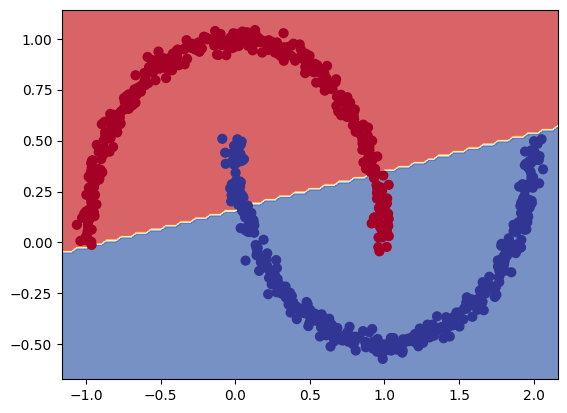

In [ ]:
# Plot decision boundaries for training and test sets
plot_decision_boundary(model_0, X_train, y_train)

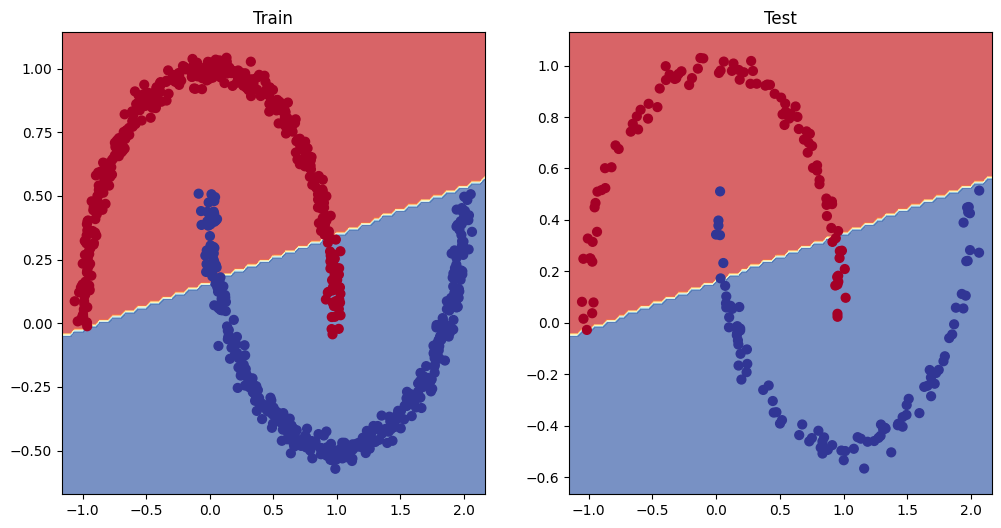

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

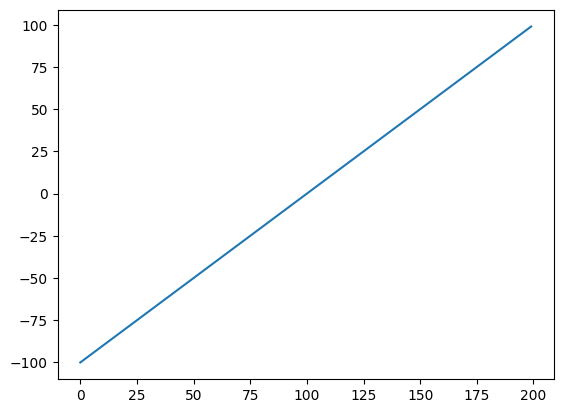

In [ ]:
# Create a straight line tensor
A = torch.arange(-100, 100, 1, dtype=torch.float32)
plt.plot(A)

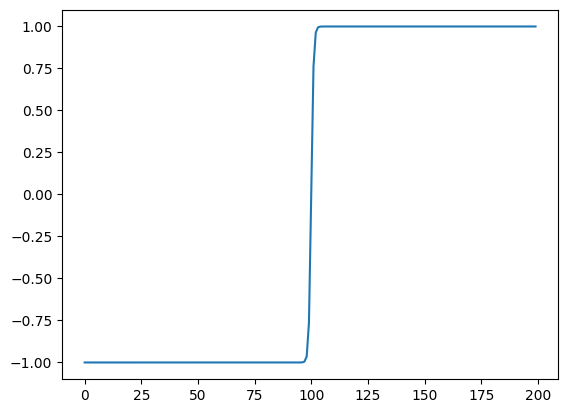

In [ ]:
# Test torch.tanh() on the tensor and plot it
plt.plot(torch.tanh(A))

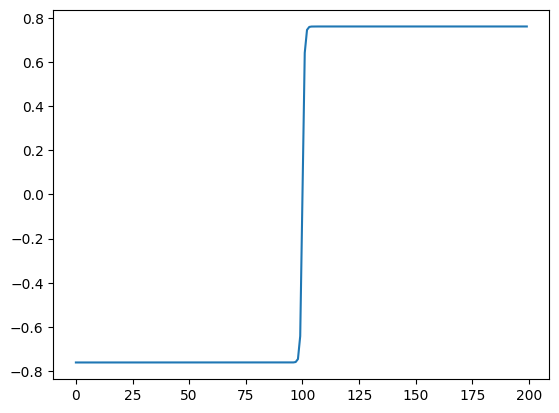

In [ ]:
# Replicate torch.tanh() and plot it
def tanh(z):
	return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
z = torch.tanh(A)
tanh(z)
plt.plot(tanh(z))

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

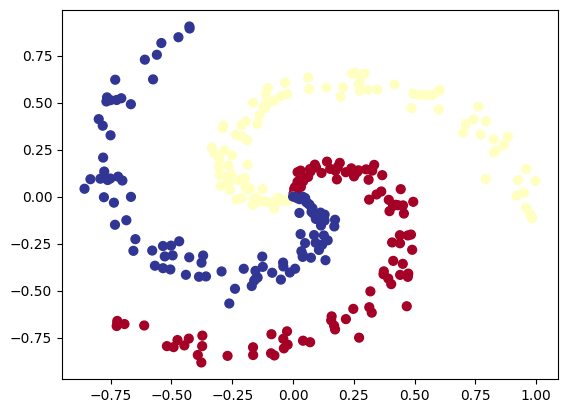

In [ ]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
X_blob = torch.from_numpy(X).type(torch.float)
y_blob = torch.from_numpy(y).type(torch.float)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
X.dtype,y.dtype

(dtype('float64'), dtype('uint8'))

In [ ]:
# Turn data into tensors
import torch
X_blob_train = torch.from_numpy(X).type(torch.float)
y_blob_test = torch.from_numpy(y).type(torch.float)
# Create train and test splits
from sklearn.model_selection import train_test_split
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                    y_blob,
                                                    test_size=0.2,#20% test, 80% train
                                                    random_state=RANDOM_SEED)

In [ ]:
# Let's calculuate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
acc_fn = Accuracy(task="multiclass", num_classes=3).to(device)
acc_fn

MulticlassAccuracy()

In [ ]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create model by subclassing nn.Module
# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)


# Instantiate model and send it to device
model_1 = BlobModel(input_features=2,
                    output_features=3,
                    hidden_units=8).to(device)
model_1

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=3, bias=True)
  )
)

In [ ]:
model_1.linear_layer_stack[0] = nn.Linear(in_features=240, out_features=8)

In [ ]:
# What's coming out of our model?

# logits (raw outputs of model)
print("Logits:")
print(model_0(X_train.to(device)[:10]).squeeze())

# Prediction probabilities
print("Pred probs:")
print(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze()))

# Prediction probabilities
print("Pred labels:")
print(torch.round(torch.sigmoid(model_0(X_train.to(device)[:10]).squeeze())))

Logits:
tensor([ 2.0205, -2.6106, -5.4960, -5.3120,  3.0917, -5.2029,  3.8828,  0.5907,
        -4.0339, -1.4019], grad_fn=<SqueezeBackward0>)
Pred probs:
tensor([0.8829, 0.0685, 0.0041, 0.0049, 0.9566, 0.0055, 0.9798, 0.6435, 0.0174,
        0.1975], grad_fn=<SigmoidBackward0>)
Pred labels:
tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0.], grad_fn=<RoundBackward0>)


In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()#เนื่องจากชุดข้อมูลแต่ละประเภทของมัลติคลาสมีจำนวนไม่เท่ากันจึงใช้ฟั่งชั้นนี้
optimizer = torch.optim.Adam(model_1.parameters(),
                            lr=0.001)


In [ ]:
#Fit the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Convert data to tensors if not already
if not torch.is_tensor(X_blob_train):
    X_blob_train = torch.tensor(X_blob_train, dtype=torch.float32)
if not torch.is_tensor(y_blob_train):
    y_blob_train = torch.tensor(y_blob_train, dtype=torch.long)
if not torch.is_tensor(X_blob_test):
    X_blob_test = torch.tensor(X_blob_test, dtype=torch.float32)
if not torch.is_tensor(y_blob_test):
    y_blob_test = torch.tensor(y_blob_test, dtype=torch.long)
# Set the number of epochs
epochs = 2000



# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)


# Build training and evaluation loop
for epoch in range(epochs):
  #Train
  model_1.train()

  y_logits = model_1(X_blob_train)

  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  y_blob_train = y_blob_train.to(torch.long)
  loss = loss_fn(y_logits, y_blob_train)

  acc = acc_fn(y_blob_train,y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #Test
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    y_blob_test = y_blob_test.to(torch.long)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = acc_fn(y_blob_test,test_pred)
  #Print out
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.01552, Acc: 0.99% | Test Loss: 0.00118, Test Acc: 1.00%
Epoch: 100 | Loss: 0.01484, Acc: 0.99% | Test Loss: 0.00067, Test Acc: 1.00%
Epoch: 200 | Loss: 0.01474, Acc: 0.99% | Test Loss: 0.00053, Test Acc: 1.00%
Epoch: 300 | Loss: 0.01464, Acc: 0.99% | Test Loss: 0.00102, Test Acc: 1.00%
Epoch: 400 | Loss: 0.01455, Acc: 0.99% | Test Loss: 0.00070, Test Acc: 1.00%
Epoch: 500 | Loss: 0.01446, Acc: 0.99% | Test Loss: 0.00052, Test Acc: 1.00%
Epoch: 600 | Loss: 0.01438, Acc: 0.99% | Test Loss: 0.00032, Test Acc: 1.00%
Epoch: 700 | Loss: 0.01430, Acc: 0.99% | Test Loss: 0.00023, Test Acc: 1.00%
Epoch: 800 | Loss: 0.01423, Acc: 0.99% | Test Loss: 0.00013, Test Acc: 1.00%
Epoch: 900 | Loss: 0.01418, Acc: 0.99% | Test Loss: 0.00007, Test Acc: 1.00%
Epoch: 1000 | Loss: 0.01413, Acc: 0.99% | Test Loss: 0.00002, Test Acc: 1.00%
Epoch: 1100 | Loss: 0.01409, Acc: 0.99% | Test Loss: 0.00004, Test Acc: 1.00%
Epoch: 1200 | Loss: 0.01406, Acc: 0.99% | Test Loss: 0.00009, Test Acc: 1.00

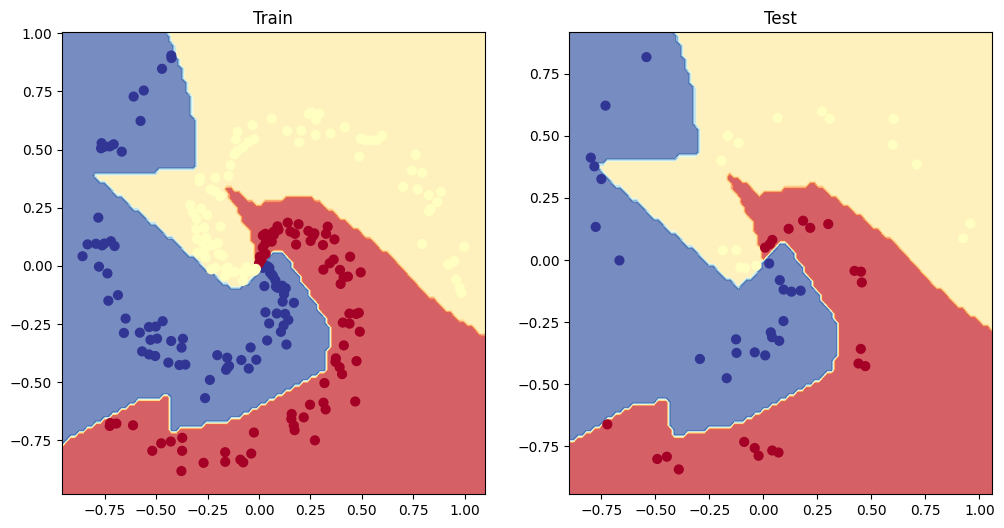

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_blob_test, y_blob_test)